In [5]:
# Exploratory Data Analysis para Fake News Dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import nltk
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np

nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Bruno\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [2]:
df_train = pd.read_parquet("data/interim/train_clean.parquet")
df_test = pd.read_parquet("data/interim/test_clean.parquet")

# Exibe as primeiras linhas do DataFrame
print(df_test.head())
print(df_train.head())

                                                text  label
0  trump promise new deal black america trump pro...      0
1  foundation tie bedevil hillary clinton preside...      1
2  number week long russia end oil dependence rbt...      0
3  codesod rule ten remy porter remy escape enter...      0
4  switch chip know anymore home scitech switch c...      0
                                                text  label
0  dark agenda behind globalism open border altma...      0
1  america poor still get shaft sami jamil jadall...      0
2  number accuser grow former miss finland accuse...      0
3  heroic prego advertisement replaces refresh we...      0
4  russia syria debbie reynolds thursday even bri...      1


In [6]:
df = pd.concat([df_train, df_test], ignore_index=True)

In [7]:
# Mapear rótulos
df["label"] = df["label"].map({0: "Real", 1: "Fake"})

C:\Users\Bruno\AppData\Local\Temp\ipykernel_8868\3440392622.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="label", palette="coolwarm")


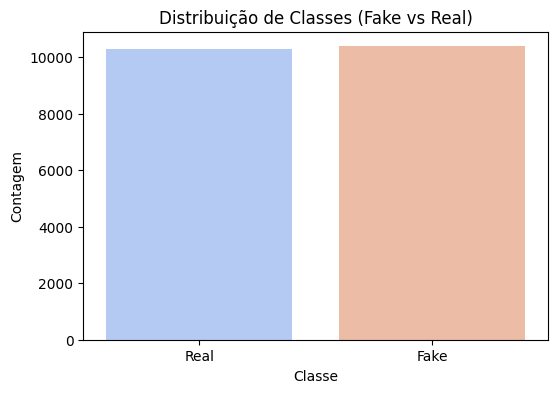

In [9]:
# -----------------------------
# 2. Distribuição das classes
# -----------------------------
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="label", palette="coolwarm")
plt.title("Distribuição de Classes (Fake vs Real)")
plt.xlabel("Classe")
plt.ylabel("Contagem")
plt.savefig('data/outputs/distribuicao_classes.png',format='png')
plt.show()

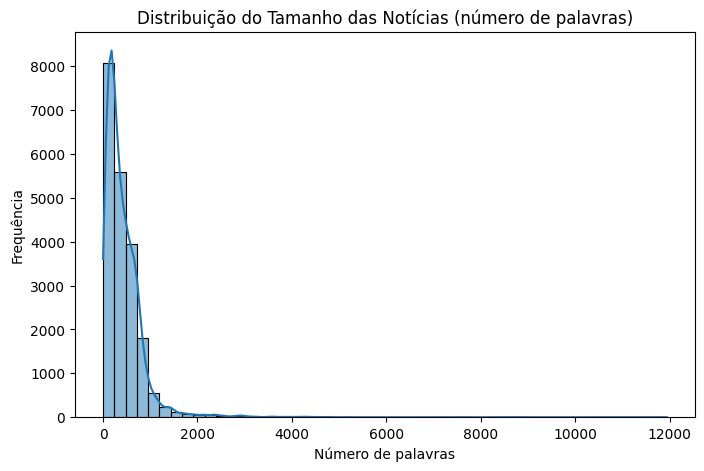

In [10]:
# -----------------------------
# 3. Histograma de tamanho dos documentos
# -----------------------------
df["text_len"] = df["text"].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(8,5))
sns.histplot(df["text_len"], bins=50, kde=True)
plt.title("Distribuição do Tamanho das Notícias (número de palavras)")
plt.xlabel("Número de palavras")
plt.ylabel("Frequência")
plt.savefig('data/outputs/distribuicao_tam_noticias.png',format='png')
plt.show()

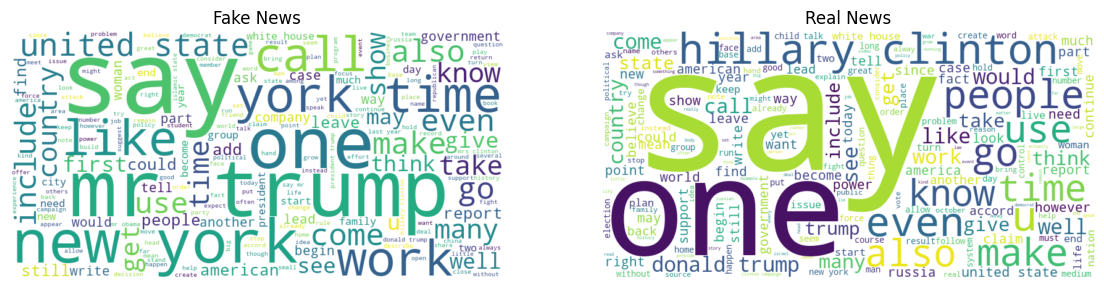

In [11]:
# -----------------------------
# 4. WordCloud por classe
# -----------------------------
stop_words = set(stopwords.words("english"))

text_fake = " ".join(df[df.label=="Fake"]["text"].tolist())
text_real = " ".join(df[df.label=="Real"]["text"].tolist())

wc_fake = WordCloud(width=800, height=400, background_color="white", stopwords=stop_words).generate(text_fake)
wc_real = WordCloud(width=800, height=400, background_color="white", stopwords=stop_words).generate(text_real)

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.imshow(wc_fake, interpolation="bilinear")
plt.axis("off")
plt.title("Fake News")

plt.subplot(1,2,2)
plt.imshow(wc_real, interpolation="bilinear")
plt.axis("off")
plt.title("Real News")
plt.savefig('data/outputs/wordcloud.png',format='png')
plt.show()

C:\Users\Bruno\AppData\Local\Temp\ipykernel_8868\2277476921.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(fake_counts), y=list(fake_words), palette="Reds_r")
C:\Users\Bruno\AppData\Local\Temp\ipykernel_8868\2277476921.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(real_counts), y=list(real_words), palette="Blues_r")


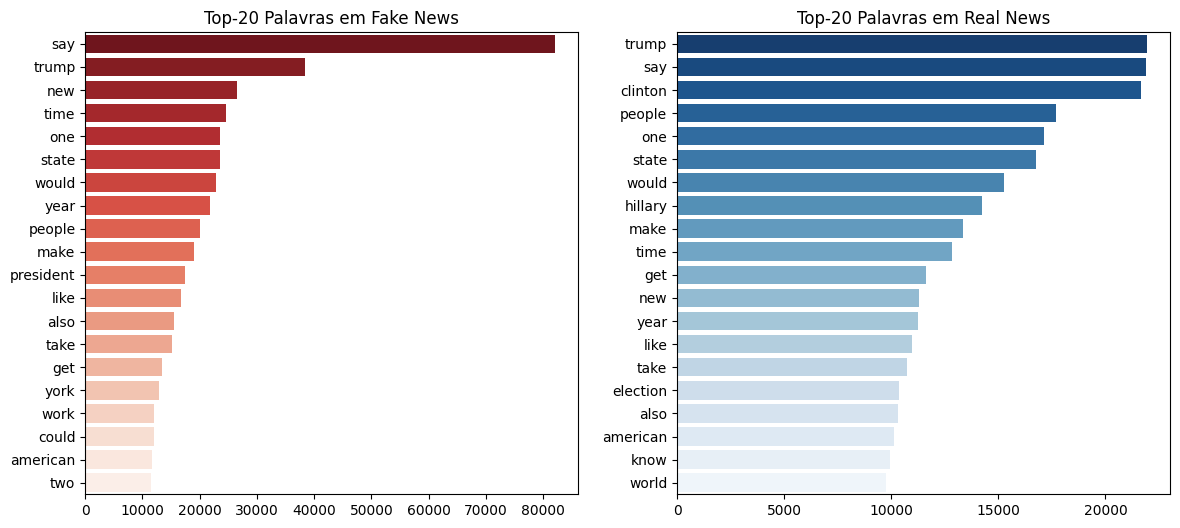

In [12]:
# -----------------------------
# 5. Palavras mais frequentes por classe
# -----------------------------
def get_top_words(texts, n=20):
    words = " ".join(texts).lower().split()
    words = [w for w in words if w not in stop_words and len(w) > 2]
    return Counter(words).most_common(n)

top_fake = get_top_words(df[df.label=="Fake"]["text"])
top_real = get_top_words(df[df.label=="Real"]["text"])

fake_words, fake_counts = zip(*top_fake)
real_words, real_counts = zip(*top_real)

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.barplot(x=list(fake_counts), y=list(fake_words), palette="Reds_r")
plt.title("Top-20 Palavras em Fake News")

plt.subplot(1,2,2)
sns.barplot(x=list(real_counts), y=list(real_words), palette="Blues_r")
plt.title("Top-20 Palavras em Real News")
plt.savefig('data/outputs/top_20_palavras.png',format='png')
plt.show()

In [14]:
# reabrir
X_train = np.load("data/processed/X_train_glove100.npy")
y_train = np.load("data/processed/y_train.npy")
X_test = np.load("data/processed/X_test_glove100.npy")
y_test = np.load("data/processed/y_test.npy")

X_all = np.vstack([X_train, X_test])

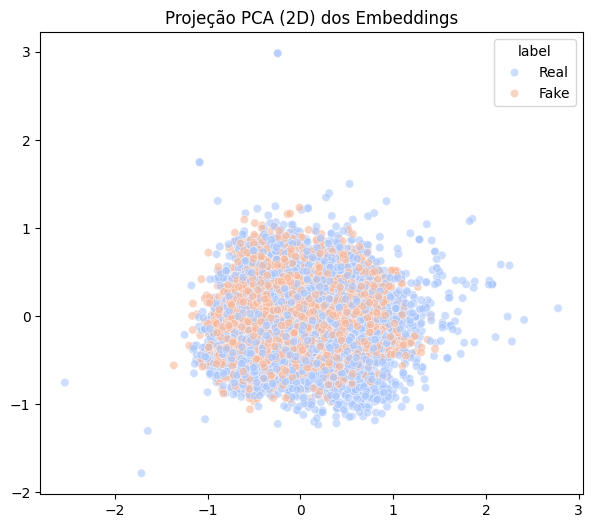

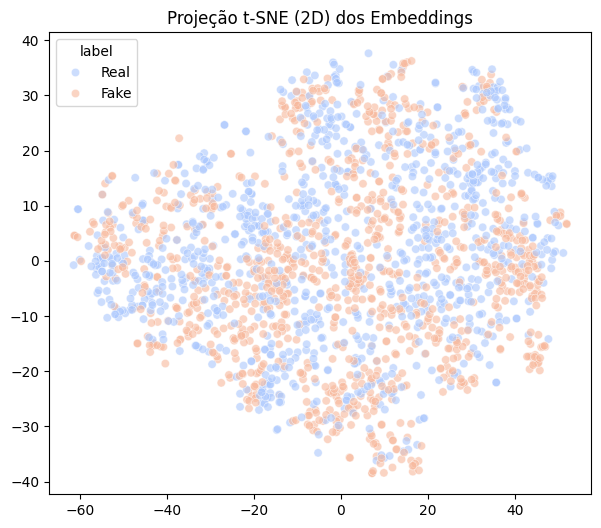

In [16]:
# -----------------------------
# 6. PCA e t-SNE nos embeddings
# -----------------------------
# Supondo que já tenha X_all (embeddings 100d GloVe médios por documento)
# Caso não tenha, use seus vetores gerados antes.
# Aqui um exemplo gerando aleatório só para demonstração:
# X_all = np.random.randn(len(df), 100)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_all)

plt.figure(figsize=(7,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df["label"], palette="coolwarm", alpha=0.6)
plt.title("Projeção PCA (2D) dos Embeddings")
plt.savefig('data/outputs/pca.png',format='png')
plt.show()

# t-SNE (cuidado, pode ser lento em datasets grandes)
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_all[:2000])  # usar subset para acelerar

plt.figure(figsize=(7,6))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=df["label"][:2000], palette="coolwarm", alpha=0.6)
plt.title("Projeção t-SNE (2D) dos Embeddings")
plt.savefig('data/outputs/tsne.png',format='png')
plt.show()